# Linear Regression - Normal Equation Implementation

## Overview
This notebook demonstrates the implementation of Linear Regression using the **Normal Equation** (closed-form solution).

### Normal Equation Formula
$$\theta = (X^T X)^{-1} X^T y$$

Where:
- $\theta$ = parameter vector (weights)
- $X$ = feature matrix
- $y$ = target vector

### Advantages
- ✅ No need to choose learning rate
- ✅ No iterations required
- ✅ Gives exact solution in one computation

### Disadvantages
- ❌ Slow for large datasets (O(n³) complexity)
- ❌ Requires matrix inversion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

## 1. Generate Synthetic Dataset

Training set: 80 samples
Test set: 20 samples


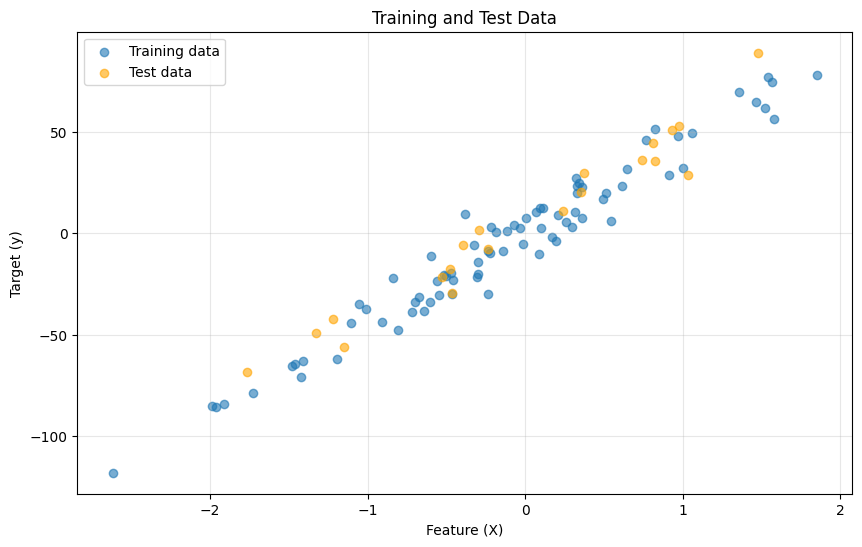

In [2]:
# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.6, label='Training data')
plt.scatter(X_test, y_test, alpha=0.6, color='orange', label='Test data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Training and Test Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2. Implementation from Scratch

### Step 1: Add Bias Term (Intercept)
We add a column of ones to X to account for the intercept term $\theta_0$

In [ ]:
def add_intercept(X):
    """
    Add a column of ones to the feature matrix for the intercept term.
    
    Args:
        X: Feature matrix of shape (m, n)
    
    Returns:
        Feature matrix with intercept column, shape (m, n+1)
    """
    m = X.shape[0]
    intercept = np.ones((m, 1))
    return np.concatenate([intercept, X], axis=1)

# Add intercept to training and test data
X_train_b = add_intercept(X_train)
X_test_b = add_intercept(X_test)

print(f"Original X_train shape: {X_train.shape}")
print(f"X_train with bias shape: {X_train_b.shape}")
print(f"\nFirst 3 rows of X_train_b:\n{X_train_b[:3]}")

Original X_train shape: (80, 1)
X_train with bias shape: (80, 2)

First 3 rows of X_train_b:
[[ 1.          0.34361829]
 [ 1.         -1.01283112]
 [ 1.         -0.60063869]]


### Step 2: Implement Normal Equation

In [4]:
def normal_equation(X, y):
    """
    Compute the closed-form solution for linear regression.
    
    Formula: θ = (X^T X)^(-1) X^T y
    
    Args:
        X: Feature matrix with intercept, shape (m, n+1)
        y: Target vector, shape (m,) or (m, 1)
    
    Returns:
        theta: Optimal parameters, shape (n+1, 1)
    """
    # Ensure y is a column vector
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)
    
    # Normal equation: θ = (X^T X)^(-1) X^T y
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return theta

# Calculate optimal parameters
theta_optimal = normal_equation(X_train_b, y_train)

print("Optimal Parameters:")
print(f"θ₀ (intercept): {theta_optimal[0][0]:.4f}")
print(f"θ₁ (slope): {theta_optimal[1][0]:.4f}")

Optimal Parameters:
θ₀ (intercept): 0.0992
θ₁ (slope): 44.2442


### Alternative: Using Moore-Penrose Pseudo-Inverse

For better numerical stability, especially when $X^T X$ is close to singular:

In [5]:
def normal_equation_pinv(X, y):
    """
    Compute the solution using pseudo-inverse for better numerical stability.
    
    Formula: θ = X⁺ y, where X⁺ is the Moore-Penrose pseudo-inverse
    
    Args:
        X: Feature matrix with intercept, shape (m, n+1)
        y: Target vector, shape (m,) or (m, 1)
    
    Returns:
        theta: Optimal parameters, shape (n+1, 1)
    """
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)
    
    # Using pseudo-inverse
    theta = np.linalg.pinv(X) @ y
    
    return theta

# Calculate using pseudo-inverse
theta_pinv = normal_equation_pinv(X_train_b, y_train)

print("\nParameters using Pseudo-inverse:")
print(f"θ₀ (intercept): {theta_pinv[0][0]:.4f}")
print(f"θ₁ (slope): {theta_pinv[1][0]:.4f}")

# Compare results
print(f"\nDifference between methods: {np.linalg.norm(theta_optimal - theta_pinv):.10f}")


Parameters using Pseudo-inverse:
θ₀ (intercept): 0.0992
θ₁ (slope): 44.2442

Difference between methods: 0.0000000000


## 3. Make Predictions

In [6]:
def predict(X, theta):
    """
    Make predictions using learned parameters.
    
    Args:
        X: Feature matrix with intercept, shape (m, n+1)
        theta: Parameters, shape (n+1, 1)
    
    Returns:
        predictions: Predicted values, shape (m,)
    """
    return (X @ theta).flatten()

# Predictions on training and test sets
y_train_pred = predict(X_train_b, theta_optimal)
y_test_pred = predict(X_test_b, theta_optimal)

print("First 5 predictions vs actual values (Test set):")
for i in range(min(5, len(y_test))):
    print(f"Predicted: {y_test_pred[i]:7.2f}, Actual: {y_test[i]:7.2f}, Error: {abs(y_test_pred[i] - y_test[i]):6.2f}")

First 5 predictions vs actual values (Test set):
Predicted:  -58.67, Actual:  -48.95, Error:   9.72
Predicted:   65.49, Actual:   89.03, Error:  23.55
Predicted:   36.05, Actual:   44.41, Error:   8.36
Predicted:  -17.25, Actual:   -5.91, Error:  11.34
Predicted:  -10.26, Actual:   -7.62, Error:   2.64


## 4. Evaluate Model Performance

In [7]:
# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=" * 50)
print("MODEL PERFORMANCE")
print("=" * 50)
print(f"\nTraining Set:")
print(f"  MSE:  {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  R²:   {train_r2:.4f}")

print(f"\nTest Set:")
print(f"  MSE:  {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  R²:   {test_r2:.4f}")
print("=" * 50)

MODEL PERFORMANCE

Training Set:
  MSE:  72.9225
  RMSE: 8.5395
  R²:   0.9564

Test Set:
  MSE:  104.2022
  RMSE: 10.2079
  R²:   0.9374


## 5. Visualize Results

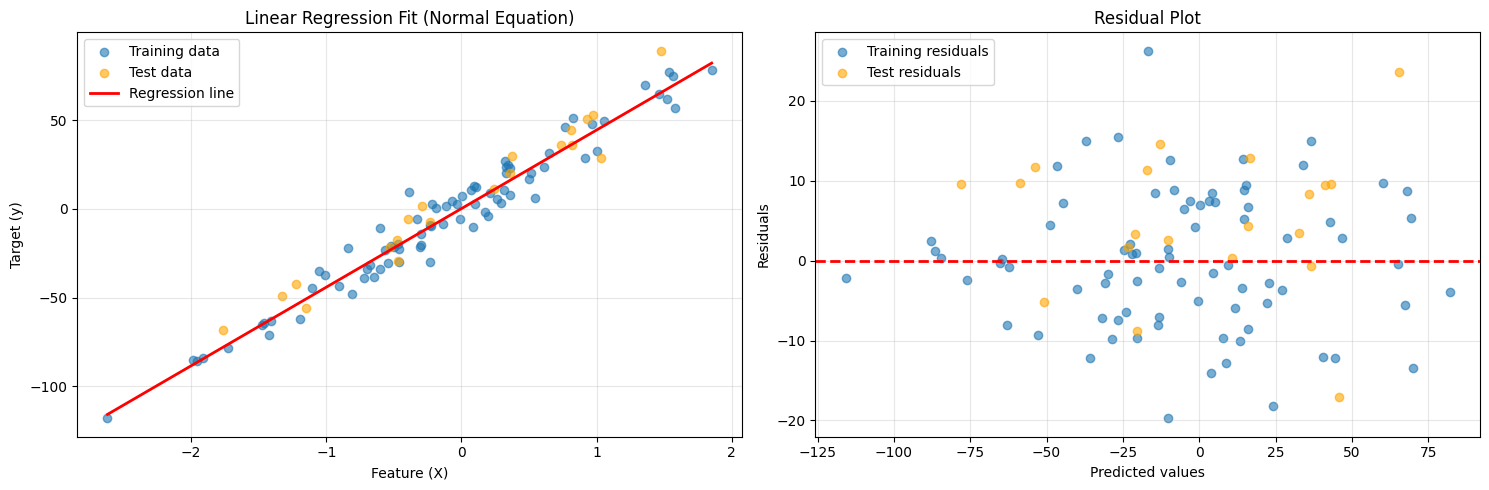

In [8]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Regression line with data points
axes[0].scatter(X_train, y_train, alpha=0.6, label='Training data')
axes[0].scatter(X_test, y_test, alpha=0.6, color='orange', label='Test data')

# Plot regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_b = add_intercept(X_range)
y_range_pred = predict(X_range_b, theta_optimal)
axes[0].plot(X_range, y_range_pred, 'r-', linewidth=2, label='Regression line')

axes[0].set_xlabel('Feature (X)')
axes[0].set_ylabel('Target (y)')
axes[0].set_title('Linear Regression Fit (Normal Equation)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

axes[1].scatter(y_train_pred, residuals_train, alpha=0.6, label='Training residuals')
axes[1].scatter(y_test_pred, residuals_test, alpha=0.6, color='orange', label='Test residuals')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Multiple Features Example

Let's demonstrate with multiple features:

In [9]:
# Generate data with multiple features
X_multi, y_multi = make_regression(n_samples=200, n_features=5, noise=15, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

print(f"Multiple features dataset:")
print(f"  Training: {X_train_m.shape}")
print(f"  Test: {X_test_m.shape}")

# Add intercept
X_train_m_b = add_intercept(X_train_m)
X_test_m_b = add_intercept(X_test_m)

# Apply normal equation
theta_multi = normal_equation(X_train_m_b, y_train_m)

print(f"\nOptimal parameters (θ):")
print(f"  Intercept (θ₀): {theta_multi[0][0]:.4f}")
for i in range(1, len(theta_multi)):
    print(f"  θ{i}: {theta_multi[i][0]:.4f}")

# Predictions
y_train_pred_m = predict(X_train_m_b, theta_multi)
y_test_pred_m = predict(X_test_m_b, theta_multi)

# Evaluate
print(f"\nPerformance:")
print(f"  Training R²: {r2_score(y_train_m, y_train_pred_m):.4f}")
print(f"  Test R²: {r2_score(y_test_m, y_test_pred_m):.4f}")
print(f"  Test RMSE: {np.sqrt(mean_squared_error(y_test_m, y_test_pred_m)):.4f}")

Multiple features dataset:
  Training: (160, 5)
  Test: (40, 5)

Optimal parameters (θ):
  Intercept (θ₀): 1.4599
  θ1: 2.6715
  θ2: 11.2934
  θ3: 65.5054
  θ4: 18.5435
  θ5: 69.4763

Performance:
  Training R²: 0.9757
  Test R²: 0.9780
  Test RMSE: 13.8341


## 7. Comparison with Scikit-learn

In [10]:
from sklearn.linear_model import LinearRegression

# Fit sklearn model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

# Compare parameters
print("Parameter Comparison:")
print("=" * 50)
print(f"Our Implementation:")
print(f"  Intercept: {theta_optimal[0][0]:.6f}")
print(f"  Slope:     {theta_optimal[1][0]:.6f}")

print(f"\nScikit-learn:")
print(f"  Intercept: {sklearn_model.intercept_:.6f}")
print(f"  Slope:     {sklearn_model.coef_[0]:.6f}")

print(f"\nDifference:")
print(f"  Intercept: {abs(theta_optimal[0][0] - sklearn_model.intercept_):.10f}")
print(f"  Slope:     {abs(theta_optimal[1][0] - sklearn_model.coef_[0]):.10f}")

# Compare predictions
sklearn_pred = sklearn_model.predict(X_test)
print(f"\nTest R² Score:")
print(f"  Our Implementation: {test_r2:.6f}")
print(f"  Scikit-learn:       {sklearn_model.score(X_test, y_test):.6f}")

Parameter Comparison:
Our Implementation:
  Intercept: 0.099222
  Slope:     44.244182

Scikit-learn:
  Intercept: 0.099222
  Slope:     44.244182

Difference:
  Intercept: 0.0000000000
  Slope:     0.0000000000

Test R² Score:
  Our Implementation: 0.937415
  Scikit-learn:       0.937415


## Key Takeaways

1. **Normal Equation** provides an exact, closed-form solution in one computation
2. **Formula**: $\theta = (X^T X)^{-1} X^T y$
3. **No hyperparameters** to tune (no learning rate, no iterations)
4. **Computational complexity**: O(n³) due to matrix inversion
5. **Best for**: Small to medium datasets with moderate number of features
6. **Use pseudo-inverse** (`np.linalg.pinv`) for better numerical stability
7. **Works for multiple features** without modification

### When to Use Normal Equation:
- ✅ Small datasets (< 10,000 samples)
- ✅ Moderate number of features (< 10,000)
- ✅ Need exact solution quickly
- ✅ Don't want to tune hyperparameters

### When NOT to Use:
- ❌ Very large datasets
- ❌ Many features (> 10,000)
- ❌ Online learning scenarios
- ❌ When $X^T X$ is singular/non-invertible